In [2]:
import pandas as pd

In [3]:
df_item=pd.read_csv("movies.dat", sep="::", header=None, names=["iid", "title", "genes"], encoding='latin-1')
df_item=df_item.dropna(axis='columns')
print(df_item)

       iid                               title                         genes
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
...    ...                                 ...                           ...
3878  3948             Meet the Parents (2000)                        Comedy
3879  3949          Requiem for a Dream (2000)                         Drama
3880  3950                    Tigerland (2000)                         Drama
3881  3951             Two Family House (2000)                         Drama
3882  3952               Contender, The (2000)                Drama|Thriller

[3883 rows x 3 columns]


/tmp/ipykernel_3805508/1867190932.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_item=pd.read_csv("movies.dat", sep="::", header=None, names=["iid", "title", "genes"], encoding='latin-1')


In [4]:
categories = ['Action' ,'Adventure', 'Animation' ,"Children's" , 'Comedy' ,'Crime', 'Documentary', 'Drama' , 'Fantasy' ,
            'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,'Thriller', 'War', 'Western']

for category in categories:
    df_item[category] = df_item['genes'].apply(lambda x: 1 if category in x.split('|') else 0)

df_item = df_item.drop('genes', axis=1)

In [5]:
df_user = pd.read_csv("users.dat", sep="::", header=None, 
names=["uid", "gender", "age", "occupation","zip code"])
df_user

/tmp/ipykernel_3805508/634168247.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_user = pd.read_csv("users.dat", sep="::", header=None,


,uid,gender,age,occupation,zip code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [6]:
df_rating = pd.read_csv("ratings.dat", sep="::",header=None, 
names=['uid', 'iid', 'y',"timestamp"])
# df_rating=df_rating.drop(columns=['timestamp'])

/tmp/ipykernel_3805508/1956484389.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_rating = pd.read_csv("ratings.dat", sep="::",header=None,


In [7]:
df_all=pd.merge(df_rating, df_item, left_on='iid', right_on='iid')

In [8]:
columns = df_all.columns.tolist()

In [9]:
res = []
for column in columns[5:]:
    res.append((column, df_all[column].sum()))
sorted(res, key = lambda x: x[1], reverse=True)

[('Comedy', 356580),
 ('Drama', 354529),
 ('Action', 257457),
 ('Thriller', 189680),
 ('Sci-Fi', 157294),
 ('Romance', 147523),
 ('Adventure', 133953),
 ('Crime', 79541),
 ('Horror', 76386),
 ("Children's", 72186),
 ('War', 68527),
 ('Animation', 43293),
 ('Musical', 41533),
 ('Mystery', 40178),
 ('Fantasy', 36301),
 ('Western', 20683),
 ('Film-Noir', 18261),
 ('Documentary', 7910)]

In [10]:
df_all["clicked"]=df_all['y'].apply(lambda x: 1 if x>=3 else 0)

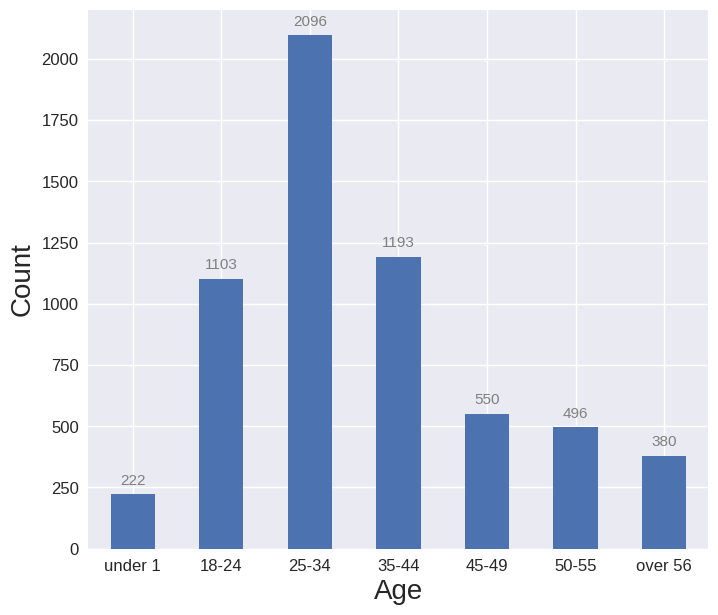

In [11]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
age_group_counts = df_user.groupby('age').size()
ax = age_group_counts.plot(kind ='bar',figsize=(8, 7))
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
                    textcoords='offset points')
ax.set_ylabel('Count', size=20)
ax.set_xlabel('Age', size=20)
ax.tick_params(axis='x', labelsize=12,rotation= 0)
ax.tick_params(axis='y', labelsize=12)
custom_labels = ["under 1","18-24","25-34","35-44","45-49","50-55","over 56"]
ax.set_xticklabels(custom_labels, fontsize=12)
plt.show()

In [12]:
df_user.age.value_counts().sort_index()

age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
Name: count, dtype: int64

## divide groups based on age

In [13]:
df_user['binary_age'] = df_user['age'].apply(lambda x: 'M' if x<=1 or x>=45 else 'F')
df_user.rename(columns={'gender':'real_gender',"binary_age":"gender"}, inplace=True)
df_user

,uid,real_gender,age,occupation,zip code,gender
0,1,F,1,10,48067,M
1,2,M,56,16,70072,M
2,3,M,25,15,55117,F
3,4,M,45,7,02460,M
4,5,M,25,20,55455,F
...,...,...,...,...,...,...
6035,6036,F,25,15,32603,F
6036,6037,F,45,1,76006,M
6037,6038,F,56,1,14706,M
6038,6039,F,45,0,01060,M


In [14]:
df_user.gender.value_counts()

gender
F    4392
M    1648
Name: count, dtype: int64

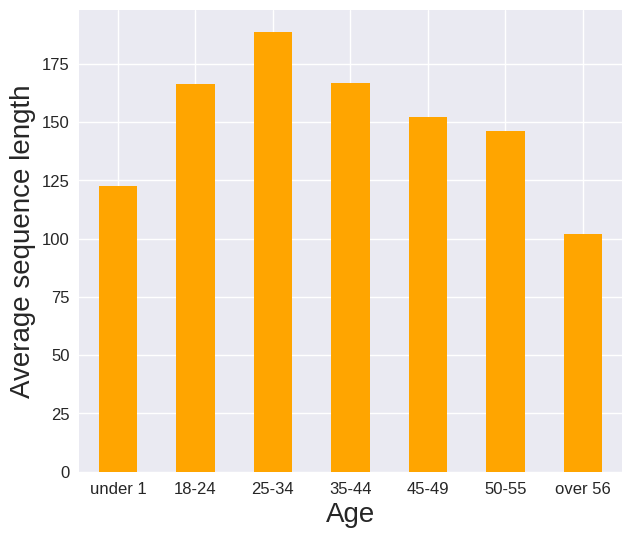

In [14]:
tmp = pd.merge(df_all,df_user, on='uid').groupby('uid')['iid'].count().reset_index()
tmp1 = pd.merge(tmp,df_user[['uid','age']], left_on='uid',right_on='uid').rename(columns={'iid':'sequence_length'})
tmp2 = tmp1.groupby('age')['sequence_length'].mean().reset_index()
ax = tmp2.plot(kind='bar',x='age',y='sequence_length',figsize=(7, 6),color = 'orange')
ax.set_ylabel('Average sequence length', size=20)
ax.set_xlabel('Age', size=20)
ax.tick_params(axis='x', labelsize=12,rotation= 0)
ax.tick_params(axis='y', labelsize=12)
custom_labels = ["under 1","18-24","25-34","35-44","45-49","50-55","over 56"]
ax.set_xticklabels(custom_labels, fontsize=12)
ax.legend().set_visible(False)
plt.show()

In [30]:
df_merge= pd.merge(df_all,df_user, on='uid')
df_merge[(df_merge['Drama']==0) & (df_merge['Sci-Fi']==1)].drop_duplicates('uid').groupby('age')['uid'].count().reset_index()
# df_merge = pd.merge(df_all,df_user, on='uid')
# tmp = df_merge[(df_merge['Drama']==0) & (df_merge['Sci-Fi']==1)].groupby('uid')['iid'].count().reset_index()
# tmp1 = pd.merge(tmp,df_user[['uid','age']], left_on='uid',right_on='uid').rename(columns={'iid':'sequence_length'})
# tmp2 = tmp1.groupby('age')['sequence_length'].mean().reset_index()
# tmp2

,age,uid
0,1,219
1,18,1076
2,25,2049
3,35,1149
4,45,529
5,50,467
6,56,340


## Generate domain A and B data

In [46]:
from pathlib import Path
import warnings
import pandas as pd

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)
c = 0
select = []
# categories = [ "Drama","Adventure"]
# target_domain = ["Drama"]
for folder_name in selected:
# for i in range(len(categories)):
#     for j in range(len(categories)):
    # category1 = categories[i]
    # category2 = categories[j]
    # category2 = categories[j]
    # category1 = "Sci-Fi"
    # category2 = "Romance"
    # if category1 == category2:
    #     continue
    # domain_A = category1
    # domain_B = category2
    # folder_name = f"{domain_A.lower()}_{domain_B.lower()}"
    data1, data2 = folder_name.split("_")   
    if 'sci-fi' == data1:
        data1 = 'Sci-Fi' 
    if 'sci-fi' == data2:
        data2 = 'Sci-Fi'
    if 'film-noir' == data1:
        data1 = 'Film-Noir'
    if 'film-noir' == data2:
        data2 = 'Film-Noir'
    domain_A = data1.capitalize() if data1!="Sci-Fi" and data1!="Film-Noir" else data1
    domain_B = data2.capitalize() if data2!="Sci-Fi" and data2!="Film-Noir" else data2
    folder_name = f"{data1.lower()}_{data2.lower()}"
    df_sourceA = df_all[(df_all[domain_A]==1) & (df_all[domain_B]==0)] # 讓item都是nonoverlap的
    df_sourceB = df_all[(df_all[domain_A]==0) & (df_all[domain_B]==1)] 

    df_sourceA = df_sourceA[['uid', 'iid', 'y', 'timestamp']]
    df_sourceB = df_sourceB[['uid', 'iid', 'y', 'timestamp']]
    df_sourceA_user = pd.merge(df_sourceA, df_user, left_on='uid', right_on='uid')
    df_sourceB_user = pd.merge(df_sourceB, df_user, left_on='uid', right_on='uid')

    df_sourceA_user = df_sourceA_user[['uid', 'iid', 'y', 'timestamp','gender']]
    df_sourceB_user = df_sourceB_user[['uid', 'iid', 'y', 'timestamp','gender']]
    
    df_sourceA_user['gender'] = df_sourceA_user['gender'].apply(lambda x: 1 if x=='M' else 0)
    df_sourceB_user['gender'] = df_sourceB_user['gender'].apply(lambda x: 1 if x=='M' else 0)

    df_sourceA_user['synthesis'] = 0
    df_sourceB_user['synthesis'] = 0

    domainA_avg_female_length = len(df_sourceA_user[df_sourceA_user['gender']==0])/len((df_sourceA_user[df_sourceA_user['gender']==0].uid.unique()))
    domainB_avg_female_length = len(df_sourceB_user[df_sourceB_user['gender']==0])/len((df_sourceB_user[df_sourceB_user['gender']==0].uid.unique()))
    domainA_avg_male_length = len(df_sourceA_user[df_sourceA_user['gender']==1])/len((df_sourceA_user[df_sourceA_user['gender']==1].uid.unique()))
    domainB_avg_male_length = len(df_sourceB_user[df_sourceB_user['gender']==1])/len((df_sourceB_user[df_sourceB_user['gender']==1].uid.unique()))
    inter_diff_A = domainA_avg_male_length - domainA_avg_female_length
    inter_diff_B = domainB_avg_male_length - domainB_avg_female_length 
    
    # 提取每个领域中的用户ID
    uids_sourceA = set(df_sourceA_user['uid'])
    uids_sourceB = set(df_sourceB_user['uid'])
    item_sourceA = len(set(df_sourceA_user['iid']))
    item_sourceB = len(set(df_sourceB_user['iid']))
    # selected.append(folder_name)
    # #and (abs(item_sourceA - item_sourceB))<300 and abs(inter_diff_A)>5 and abs(inter_diff_B)>5
    # if inter_diff_A>4 and inter_diff_B>4:
    # Path(f"../Movie_lens/{folder_name}").mkdir(parents=True, exist_ok=True)
    # df_sourceA_user.to_csv(f"../Movie_lens/{folder_name}/"+ domain_A + '.csv',index=False)
    # df_sourceB_user.to_csv(f"../Movie_lens/{folder_name}/"+ domain_B +'.csv',index=False)
    #     # selected.append((domain_A, domain_B))
    # selected.append(folder_name)
    # if  domainA_avg_male_length - domainA_avg_female_length<5 and domainB_avg_male_length - domainB_avg_female_length<5 \
    #     and df_sourceA_user['iid'].nunique()>100 and df_sourceB_user['iid'].nunique()>100 :
    if df_sourceA_user['iid'].nunique()>=110 and df_sourceB_user['iid'].nunique()>=110:
        select.append(folder_name)
        print("*"*50)
        print("Domain A: ", domain_A)
        print("Domain B: ", domain_B)
        print(f"领域A中的用户数量: {len(uids_sourceA)}")
        print(f"领域B中的用户数量: {len(uids_sourceB)}")
        print(f"领域A和领域B的交集: {len(uids_sourceA & uids_sourceB)}")
        print(f"领域A中的商品数量: {df_sourceA_user['iid'].nunique()}")
        print(f"领域B中的商品数量: {df_sourceB_user['iid'].nunique()}")
        print("Domain A average interaction number per user difference between male and female:", domainA_avg_male_length - domainA_avg_female_length)
        print("Domain B average interaction number per user difference between male and female:", domainB_avg_male_length - domainB_avg_female_length)
        print("*"*50)
            # if c>20:
    #     break
    # break

**************************************************
Domain A:  Action
Domain B:  Documentary
领域A中的用户数量: 6012
领域B中的用户数量: 2243
领域A和领域B的交集: 2241
领域A中的商品数量: 495
领域B中的商品数量: 110
Domain A average interaction number per user difference between male and female: 22.076780888358932
Domain B average interaction number per user difference between male and female: 0.015962598239614767
**************************************************
**************************************************
Domain A:  Adventure
Domain B:  Documentary
领域A中的用户数量: 5894
领域B中的用户数量: 2243
领域A和领域B的交集: 2206
领域A中的商品数量: 281
领域B中的商品数量: 110
Domain A average interaction number per user difference between male and female: 8.478000831234382
Domain B average interaction number per user difference between male and female: 0.015962598239614767
**************************************************
**************************************************
Domain A:  Children's
Domain B:  Documentary
领域A中的用户数量: 5283
领域B中的用户数量: 2243
领域A和领域B的交集: 2110
领域A中的

In [10]:
len(df_sourceA_user[df_sourceA_user['gender']==0])/len((df_sourceA_user[df_sourceA_user['gender']==0].uid.unique()))

12.508421709295071

In [16]:
from pathlib import Path
# target = ['adventure_romance',
#  'action_horror',
#  'comedy_drama',
#  'action_romance',
#  'thriller_romance',
#  'horror_adventure',
#  'horror_romance',
#  'sci-fi_romance']
# # 男女購買平率差異大的組合
# target = ['adventure_romance','adventure_thriller',
#  'action_sci-fi',
#  'action_romance',
#  'sci-fi_Thriller']
# #兩個domain商品數量大
# target = ['action_comedy','action_drama',"comedy_thriller"]
selected  =["drama_sci-fi"]
# selected = ['action_musical']
# ages = [1,18,25,35,45,50,56]
for t in selected:
    data1, data2 = t.split("_")   
    if 'sci-fi' == data1:
        data1 = 'Sci-Fi' 
    if 'sci-fi' == data2:
        data2 = 'Sci-Fi'
    if 'film-noir' == data1:
        data1 = 'Film-Noir'
    if 'film-noir' == data2:
        data2 = 'Film-Noir'
    domain_A = data1.capitalize() if data1!="Sci-Fi" and data1!="Film-Noir" else data1
    domain_B = data2.capitalize() if data2!="Sci-Fi" and data2!="Film-Noir" else data2
    folder_name = f"{data1.lower()}_{data2.lower()}"

    df_sourceA = df_all[(df_all[domain_A]==1) & (df_all[domain_B]==0)] # 讓item都是nonoverlap的
    df_sourceB = df_all[(df_all[domain_A]==0) & (df_all[domain_B]==1)] 

    df_sourceA = df_sourceA[['uid', 'iid', 'y', 'timestamp']]
    df_sourceB = df_sourceB[['uid', 'iid', 'y', 'timestamp']]
    df_sourceA_user = pd.merge(df_sourceA, df_user, left_on='uid', right_on='uid')
    df_sourceB_user = pd.merge(df_sourceB, df_user, left_on='uid', right_on='uid')

    df_sourceA_user = df_sourceA_user[['uid', 'iid', 'y', 'timestamp','gender']]
    df_sourceB_user = df_sourceB_user[['uid', 'iid', 'y', 'timestamp','gender']]
    df_sourceA_user['gender'] = df_sourceA_user['gender'].apply(lambda x: 1 if x=='M' else 0)
    df_sourceB_user['gender'] = df_sourceB_user['gender'].apply(lambda x: 1 if x=='M' else 0)

    df_sourceA_user['synthesis'] = 0
    df_sourceB_user['synthesis'] = 0
    

    # 提取每个领域中的用户ID
    uids_sourceA = set(df_sourceA_user['uid'])
    uids_sourceB = set(df_sourceB_user['uid'])

    # 找出所有三个领域中都存在的用户ID
    overlap_uid1 = uids_sourceA.intersection(uids_sourceB)

    # 计算重叠用户的数量
    overlap_user1_count = len(overlap_uid1)
    print("*"*50)
    print("Domain A: ", domain_A)
    print("Domain B: ", domain_B)
    print(f"领域A中的用户数量: {len(uids_sourceA)}")
    print(f"领域B中的用户数量: {len(uids_sourceB)}")
    print(f"领域A和领域B的交集: {len(uids_sourceA & uids_sourceB)}")
    print(f"领域A中的商品数量: {df_sourceA_user['iid'].nunique()}")
    print(f"领域B中的商品数量: {df_sourceB_user['iid'].nunique()}")
    print("*"*50)
    print(folder_name)
    Path(f"../reverse_1and45age_dataset/{folder_name}").mkdir(parents=True, exist_ok=True)
    df_sourceA_user.to_csv(f"../reverse_1and45age_dataset/{folder_name}/"+ domain_A + '.csv',index=False)
    df_sourceB_user.to_csv(f"../reverse_1and45age_dataset/{folder_name}/"+ domain_B +'.csv',index=False)


**************************************************
Domain A:  Drama
Domain B:  Sci-Fi
领域A中的用户数量: 6028
领域B中的用户数量: 5829
领域A和领域B的交集: 5817
领域A中的商品数量: 1471
领域B中的商品数量: 252
**************************************************
drama_sci-fi


## Get male/female ratio in source, target and overlap

In [18]:
import pandas as pd
target = ["drama_sci-fi","action_comedy","comedy_drama","sci-fi_thriller"]
selected = []
length_diff = {}
user_ratio = {}
ages = [1,18,25,35,45,50,56]
# categories =['Drama',"Animation"]
# categories = ["Thriller","Adventure","Horror"]
# for i in range(len(categories)):
#     for j in range(len(categories)):
age_df = []
for t in target:
    data1,data2 = t.split("_")   
    # data1 = categories[i].lower()
    # category2 = categories[j]
    # data2 = categories[j].lower()
    # category1 = "Sci-Fi"
    # category2 = "Romance"
    if data1 == data2:
        continue
    if 'sci-fi' == data1:
        data1 = 'Sci-Fi' 
    if 'sci-fi' == data2:
        data2 = 'Sci-Fi'
    if 'film-noir' == data1:
        data1 = 'Film-Noir'
    if 'film-noir' == data2:
        data2 = 'Film-Noir'
    domain_A = data1.capitalize() if data1!="Sci-Fi" and data1!="Film-Noir" else data1
    domain_B = data2.capitalize() if data2!="Sci-Fi" and data2!="Film-Noir" else data2
    folder_name = f"{data1.lower()}_{data2.lower()}"

    df_sourceA = df_all[(df_all[domain_A]==1) & (df_all[domain_B]==0)] # 讓item都是nonoverlap的
    df_sourceB = df_all[(df_all[domain_A]==0) & (df_all[domain_B]==1)] 

    df_sourceA = df_sourceA[['uid', 'iid', 'y', 'timestamp']]
    df_sourceB = df_sourceB[['uid', 'iid', 'y', 'timestamp']]
    df_sourceA_user = pd.merge(df_sourceA, df_user, left_on='uid', right_on='uid')
    df_sourceB_user = pd.merge(df_sourceB, df_user, left_on='uid', right_on='uid')

    df_sourceA_user = df_sourceA_user[['uid', 'iid', 'y', 'timestamp','gender']]
    df_sourceB_user = df_sourceB_user[['uid', 'iid', 'y', 'timestamp','gender']]

    df_sourceA_user['gender'] = df_sourceA_user['gender'].apply(lambda x: 1 if x=='M' else 0)
    df_sourceB_user['gender'] = df_sourceB_user['gender'].apply(lambda x: 1 if x=='M' else 0)
    
    domainA_avg_female_length = len(df_sourceA_user[df_sourceA_user['gender']==0])/len((df_sourceA_user[df_sourceA_user['gender']==0].uid.unique()))
    domainB_avg_female_length = len(df_sourceB_user[df_sourceB_user['gender']==0])/len((df_sourceB_user[df_sourceB_user['gender']==0].uid.unique()))
    domainA_avg_male_length = len(df_sourceA_user[df_sourceA_user['gender']==1])/len((df_sourceA_user[df_sourceA_user['gender']==1].uid.unique())) if len((df_sourceA_user[df_sourceA_user['gender']==1].uid.unique())) else 0
    domainB_avg_male_length = len(df_sourceB_user[df_sourceB_user['gender']==1])/len((df_sourceB_user[df_sourceB_user['gender']==1].uid.unique())) if len((df_sourceB_user[df_sourceB_user['gender']==1].uid.unique())) else 0
    domain_A_avg_seq_length = len(df_sourceA_user)/len(df_sourceA_user['uid'].unique())
    domain_B_avg_seq_length = len(df_sourceB_user)/len(df_sourceB_user['uid'].unique())
    uids_sourceA = set(df_sourceA_user['uid'])
    uids_sourceB = set(df_sourceB_user['uid'])
    overlap_uid1 = uids_sourceA.intersection(uids_sourceB)
    all_user = pd.concat([df_sourceA_user,df_sourceB_user])
    overlap_user = all_user[all_user['uid'].isin(overlap_uid1)]
    overlap_avg_seq_length = len(overlap_user)/len(overlap_user['uid'].unique())
    age_df.append({"scenario":folder_name,"age":age,"domain_A_avg_seq_length":domain_A_avg_seq_length,"domain_B_avg_seq_length":domain_B_avg_seq_length,"overlap_avg_seq_length":overlap_avg_seq_length})
    
    inter_diff_A = domainA_avg_male_length - domainA_avg_female_length
    inter_diff_B = domainB_avg_male_length - domainB_avg_female_length 
    length_diff[domain_A] = inter_diff_A
    length_diff[domain_B] = inter_diff_B
    # 提取每个领域中的用户ID
    uids_sourceA = set(df_sourceA_user['uid'])
    uids_sourceB = set(df_sourceB_user['uid'])

    # 找出所有三个领域中都存在的用户ID
    overlap_uid1 = uids_sourceA.intersection(uids_sourceB)

    overlap_user1_count = len(overlap_uid1)
    gender_countsA = df_sourceA_user.drop_duplicates('uid')['gender'].value_counts()
    A_male_count = gender_countsA.get(1, 0)  # 1 表示男性
    A_female_count = gender_countsA.get(0, 0)  # 0 表示女性
    female_uids_A = df_sourceA_user[df_sourceA_user['gender'] == 0]['uid'].unique()
    
    gender_countsB = df_sourceB_user.drop_duplicates('uid')['gender'].value_counts()
    B_male_count = gender_countsB.get(1, 0)  # 0 表示男性
    B_female_count = gender_countsB.get(0, 0)  # 1 表示女性
    female_uids_B = df_sourceB_user[df_sourceB_user['gender'] == 0]['uid'].unique()
    
    # get overlap user data from A and B
    overlap_uids = list(overlap_uid1)
    df_sourceA_overlap = df_sourceA_user[df_sourceA_user['uid'].isin(overlap_uids)]
    #count gender for male and female
    gender_counts_overlap = df_sourceA_overlap[~df_sourceA_overlap.duplicated(subset=['uid'])]['gender'].value_counts()
    if len(gender_counts_overlap.index)>1:
        overlap_female_count = gender_counts_overlap[0]
        overlap_male_count = gender_counts_overlap[1]
    else:
        if gender_counts_overlap.index==0:
            overlap_female_count = gender_counts_overlap[0]
            overlap_male_count = 0
        else:
            overlap_male_count = gender_counts_overlap[1]
            overlap_female_count = 0
    user_ratio[folder_name] = overlap_male_count/overlap_female_count
    # if (domainA_avg_male_length-domainA_avg_female_length)>5 and  (domainB_avg_male_length-domainB_avg_female_length)>1\
    #     and df_sourceA_user['iid'].nunique()>110 and df_sourceB_user['iid'].nunique()>110:
    selected.append(folder_name)
    print("*"*50)
    print("Domain A: ", domain_A)
    print("Domain B: ", domain_B)
    # print("/mnt/samuel/C2DSR_fairness/C2DSR_src/fairness_dataset/daslnt A domain male:", A_male_count)
    print("A domain male:", A_male_count)
    print("A domain female:", A_female_count)
    print("B domain male:", B_male_count)
    print("B domain female:", B_female_count)
    print(f"领域A中的商品数量: {df_sourceA_user['iid'].nunique()}")
    print(f"领域B中的商品数量: {df_sourceB_user['iid'].nunique()}")
    print("A and B domain total overlap user:", overlap_user1_count)
    print("overlap male : ",overlap_male_count)
    print("overlap female: ",overlap_female_count)
    print("A domain male/female ratio:", A_male_count/A_female_count)
    print("B domain male/female ratio:", B_male_count/B_female_count)
    print("overlap male/female ratio:", overlap_male_count/overlap_female_count)
    print("A domain average interaction number per user:", domain_A_avg_seq_length)
    print("B domain average interaction number per user:", domain_B_avg_seq_length)
    print("Domain A average interaction number per user difference between male and female:", domainA_avg_male_length - domainA_avg_female_length)
    print("Domain B average interaction number per user difference between male and female:", domainB_avg_male_length - domainB_avg_female_length)
    print("*"*50)


**************************************************
Domain A:  Drama
Domain B:  Sci-Fi
A domain male: 4386
A domain female: 1642
B domain male: 4274
B domain female: 1555
领域A中的商品数量: 1471
领域B中的商品数量: 252
A and B domain total overlap user: 5817
overlap male :  4268
overlap female:  1549
A domain male/female ratio: 2.671132764920828
B domain male/female ratio: 2.7485530546623793
overlap male/female ratio: 2.7553260167850224
A domain average interaction number per user: 55.711844724618445
B domain average interaction number per user: 23.776977183050267
Domain A average interaction number per user difference between male and female: 7.9439504946810615
Domain B average interaction number per user difference between male and female: 7.326254463163945
**************************************************
**************************************************
Domain A:  Action
Domain B:  Comedy
A domain male: 4354
A domain female: 1623
B domain male: 4378
B domain female: 1631
领域A中的商品数量: 430
领域B中的商品数量: 

([<matplotlib.axis.XTick at 0x769b70c15af0>,
 [Text(1, 0, '1'),
  Text(18, 0, '18'),
  Text(25, 0, '25'),
  Text(35, 0, '35'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(56, 0, '56')])

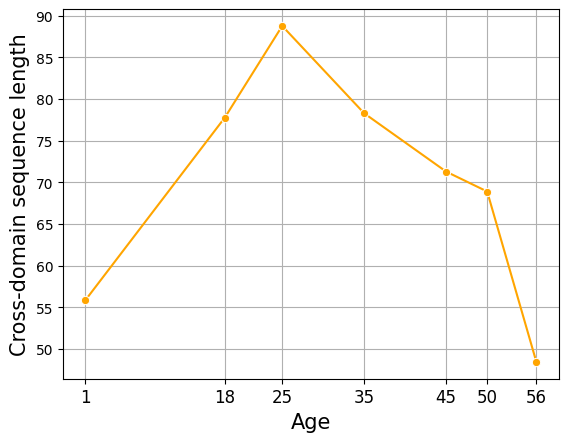

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
age_df = pd.DataFrame(age_df)
target = age_df.groupby(['age'])[['overlap_avg_seq_length','domain_A_avg_seq_length','domain_B_avg_seq_length']].mean().reset_index()
sns.lineplot(data=target, x='age', y='overlap_avg_seq_length',marker='o',color ='orange')
# sns.lineplot(data=target, x='age', y='domain_A_avg_seq_length',label='overlap_avg_seq_length',marker='o')
# sns.lineplot(data=target, x='age', y='domain_B_avg_seq_length',label='overlap_avg_seq_length',marker='o')
plt.grid(True)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cross-domain sequence length', fontsize=15)
plt.xticks([1, 18, 25, 35, 45, 50, 56],fontsize = 12)
# plt.legend(fontsize=12,loc='upper right')
# plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.47, 1.15), ncol=1)

In [28]:
pd.DataFrame(user_ratio,index = range(0,len(user_ratio))).iloc[0].describe()

count    306.000000
mean       2.814360
std        0.262327
min        2.313675
25%        2.601716
50%        2.745229
75%        3.033378
max        3.530511
Name: 0, dtype: float64

In [31]:
pd.DataFrame(user_ratio,index = range(0,len(user_ratio))).iloc[0].sort_values(ascending=False)[:30]

western_drama            3.530511
drama_western            3.530511
crime_film-noir          3.414921
film-noir_crime          3.414921
documentary_western      3.414044
western_documentary      3.414044
western_film-noir        3.395574
film-noir_western        3.395574
comedy_western           3.330749
western_comedy           3.330749
western_horror           3.328409
horror_western           3.328409
documentary_film-noir    3.326622
film-noir_documentary    3.326622
film-noir_mystery        3.301090
mystery_film-noir        3.301090
fantasy_documentary      3.267819
documentary_fantasy      3.267819
thriller_film-noir       3.265385
film-noir_thriller       3.265385
documentary_horror       3.259635
horror_documentary       3.259635
western_war              3.254625
war_western              3.254625
western_adventure        3.251101
adventure_western        3.251101
animation_film-noir      3.212283
film-noir_animation      3.212283
western_romance          3.200000
romance_wester

## Get train/test gender raio and number of data

In [17]:
import random
import glob
folder_list = glob.glob("../Movie_lens/*")
folder_list = [folder.split("/")[-1] for folder in folder_list]
for folder in folder_list:
    print(folder)
    try:
        with open(f"../Movie_lens/{folder}/train.txt") as f:
            lines = f.readlines()
            lines = [line.strip() for line in lines]
            d = [list(map(int, data.strip().split(" "))) for data in lines[2:]]
            ratio= len([tmp for tmp in d if tmp[1]==1])/len([tmp for tmp in d if tmp[1]==0])
            print(f"train data length: {len(lines)}")
        with open(f"../Movie_lens/{folder}/test.txt") as f:
            lines = f.readlines()
            lines = [line.strip() for line in lines]
            num_items_x, num_items_y = lines[:2]
            d = [list(map(int, data.strip().split(" "))) for data in lines[2:]]
            print(f"test data length: {len(lines)}")
            male_data = [tmp for tmp in d if tmp[1]==1]
            female_data = [tmp for tmp in d if tmp[1]==0]
            target_num = int(len(female_data)*ratio)
            if len(male_data) >= target_num:
                sampled_elements = random.sample(male_data, target_num)
            else:
                print(ratio)
                print(len(male_data)/len(female_data))
                print("not enough data for sampling!")
                continue
            all_data = sampled_elements+female_data
            # random.shuffle(all_data)
            print(len(sampled_elements)/len(female_data))
            print(ratio,"\n")
    except Exception as e:
        print(e)
        continue
        
        
        

adventure_romance
train data length: 11855
test data length: 3273
2.618362831858407
2.619236641221374 

action_horror
train data length: 11531
test data length: 3593
3.768924302788845
3.7699627637567232 

romance_horror
train data length: 10242
test data length: 3179
2.6747685185185186
2.6755204594400572 

drama_comedy
train data length: 17811
test data length: 9603
2.582462686567164
2.582578957956146 

action_romance
train data length: 13879
test data length: 4677
2.8256955810147297
2.8260270195754065 

romance_thriller
train data length: 13688
test data length: 4459
2.683471074380165
2.6839838492597576 

adventure_horror
train data length: 9646
test data length: 2579
3.6939890710382515
3.6952288218111002 

horror_adventure
train data length: 9752
test data length: 2298
3.6477732793522266
3.6494992846924177 

horror_romance
train data length: 10254
test data length: 2783
2.560819462227913
2.560958666203543 

action_thriller
train data length: 12537
test data length: 3208
3.44660194174

## Get item sequence time interval of male/female 

In [18]:
import pandas as pd
folder_name = "action_romance"
df_sourceA_user = pd.read_csv(f"../Movie_lens_time/{folder_name}/Action.csv")
df_sourceB_user = pd.read_csv(f"../Movie_lens_time/{folder_name}/Romance.csv")
source_uid = set(df_sourceA_user.uid)
target_uid = set(df_sourceB_user.uid)
overlap_uid = source_uid.intersection(target_uid)
overlap_df = df_sourceA_user[df_sourceA_user.uid.isin(overlap_uid)]
group = overlap_df.groupby('uid')
overlap_df_male = overlap_df[overlap_df.gender==1]
overlap_df_female = overlap_df[overlap_df.gender==0]
overlap_df_male_group = overlap_df_male.groupby('uid')['timestamp']
overlap_df_female_group = overlap_df_female.groupby('uid')['timestamp']

male_all_ts_diff = []
male_all_ts = []
for uid, ts in overlap_df_male_group:
    ts_diff = ts.diff().abs()[1:]
    min_ts = ts.min()
    ts-=min_ts
    male_all_ts_diff.append(ts_diff.values)
    male_all_ts.append(ts.values)
female_all_ts_diff = []
female_all_ts = []
for uid, ts in overlap_df_female_group:
    ts_diff = ts.diff().abs()[1:]
    min_ts = ts.min()
    ts-=min_ts
    female_all_ts_diff.append(ts_diff.values)
    female_all_ts.append(ts.values)



/tmp/ipykernel_1369464/3133316141.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ts_diff = ts.diff().abs()[1:]
/tmp/ipykernel_1369464/3133316141.py:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ts_diff = ts.diff().abs()[1:]


In [15]:
import math
mean_ts_diff_female = [data.mean() for data in female_all_ts_diff]
mean_ts_diff_female = [x for x in mean_ts_diff_female if not math.isnan(x)]
mean_ts_diff_male = [data.mean() for data in male_all_ts_diff]
mean_ts_diff_male = [x for x in mean_ts_diff_male if not math.isnan(x)]
sum(mean_ts_diff_female)/len(mean_ts_diff_female),sum(mean_ts_diff_male)/len(mean_ts_diff_male)

/tmp/ipykernel_1369464/2471074836.py:2: RuntimeWarning: Mean of empty slice.
  mean_ts_diff_female = [data.mean() for data in female_all_ts_diff]
/home/samuel/.conda/envs/predictor/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_1369464/2471074836.py:4: RuntimeWarning: Mean of empty slice.
  mean_ts_diff_male = [data.mean() for data in male_all_ts_diff]


(1702727.3266616918, 1698287.7796235136)

In [16]:
import numpy as np
male_all_ts_diff = [d  for diff in male_all_ts_diff for d in diff]
female_all_ts_diff = [d  for diff in female_all_ts_diff for d in diff]
sum(male_all_ts_diff)/len(male_all_ts_diff),sum(female_all_ts_diff)/len(female_all_ts_diff)

(2270950.439863222, 3253237.72899437)

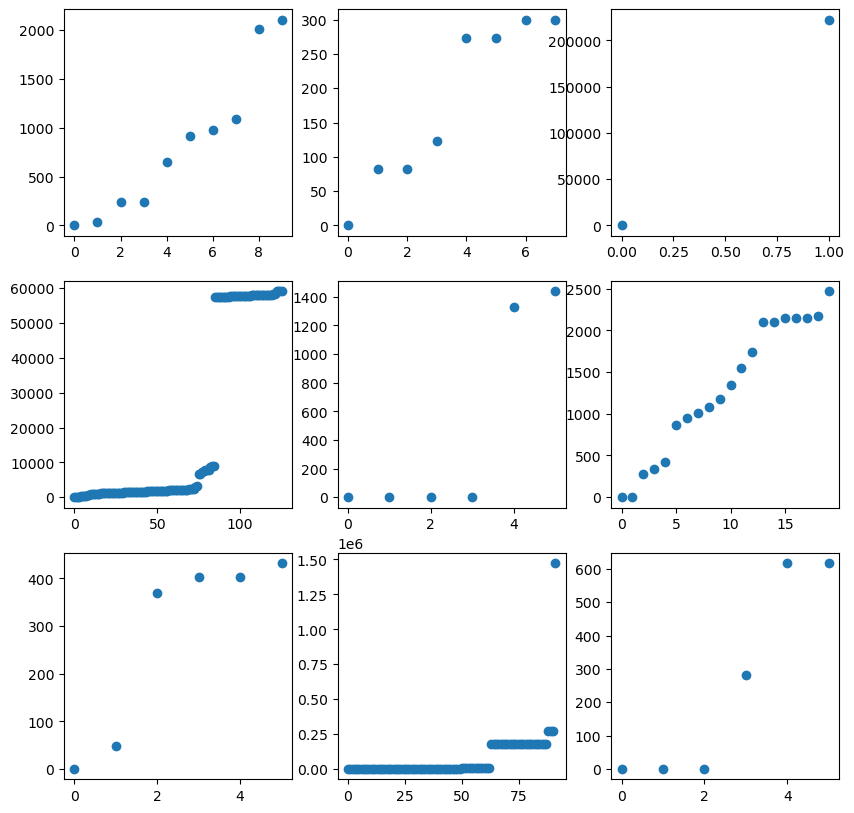

In [17]:
import matplotlib.pyplot as plt
import random
fig,ax = plt.subplots(3,3,figsize=(10,10))
c = random.randint(0,len(male_all_ts))
for i in range(3):
    for j in range(3):
        ax[i][j].scatter(x = list(range(len(male_all_ts[c]))), y = sorted(male_all_ts[c]))
        c+=1
        # break

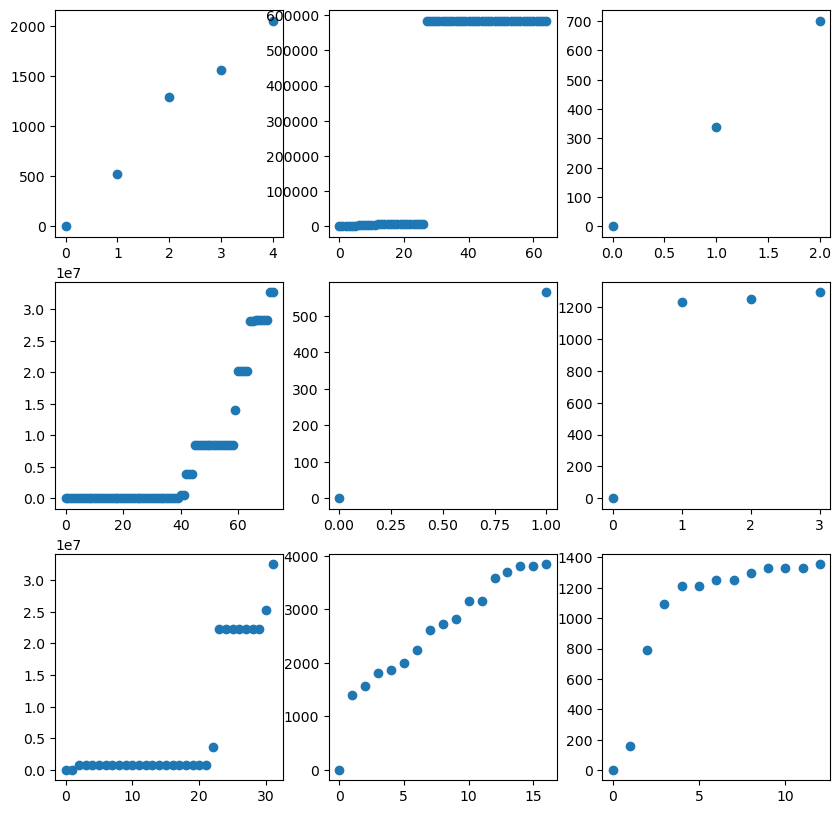

In [19]:
import matplotlib.pyplot as plt
import random
fig,ax = plt.subplots(3,3,figsize=(10,10))
c = random.randint(0,len(female_all_ts))
for i in range(3):
    for j in range(3):
        ax[i][j].scatter(x = list(range(len(female_all_ts[c]))), y = sorted(female_all_ts[c]))
        c+=1
        # break